In [1]:
import pandas as pd

In [2]:
training_data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
training_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,46.0,27.0,18.0,0.049123,38,27.0,23.0,0.026316,31.0,28.0,23.0,0.014035,5.4765,3.65100,2.92080,0.004484,85,78.0,70,0.027322,150,115.0,100,0.091

In [3]:
testing_data = pd.read_csv('/content/ALS_TestingData_78.csv')
testing_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.00,7.00,3.00,0.049180,7.900,7.100,5.700,0.018033,0.002969,91,76.0,69,0.180328,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.00,9.50,5.00,0.030568,5.700,4.300,3.400,0.005022,0.002907,106,96.0,75,0.067686,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.00,3.00,2.00,0.004172,8.200,5.400,2.900,0.007371,0.002281,85,72.5,65,0.026420,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.00,5.00,3.00,0.061856,7.500,5.200,3.900,0.037113,0.002408,67,59.0,54,0.134021,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.00,9.50,5.00,0.016588,7.500,6.100,4.500,0.007109,0.002731,102,85.0,69,0.078199,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,171,60.0,37,0.

In [4]:
#finding the common columns as there is irregularity for training and testing set
train_cols = list(training_data.columns)
test_cols = list(testing_data.columns)
common_cols = []

for col in train_cols:
  if col in test_cols:
    common_cols.append(col)

In [5]:
#extracting the usable columns 
usable_cols = [col for col in common_cols if 'range' not in col.lower().split('_') and 'min' not in col.lower().split('_') and 'max' not in col.lower().split('_') ]
usable_cols.remove('ID')
usable_cols.remove('SubjectID')
usable_cols

['Age_mean',
 'Albumin_median',
 'ALSFRS_slope',
 'ALSFRS_Total_median',
 'ALT.SGPT._median',
 'AST.SGOT._median',
 'Bicarbonate_median',
 'Blood.Urea.Nitrogen..BUN._median',
 'bp_diastolic_median',
 'bp_systolic_median',
 'Calcium_median',
 'Chloride_median',
 'Creatinine_median',
 'Gender_mean',
 'Glucose_median',
 'hands_median',
 'Hematocrit_median',
 'Hemoglobin_median',
 'leg_median',
 'mouth_median',
 'onset_delta_mean',
 'onset_site_mean',
 'Platelets_median',
 'Potassium_median',
 'pulse_median',
 'respiratory_median',
 'Sodium_median',
 'trunk_median',
 'Urine.Ph_median']

In [6]:
len(usable_cols)

29

In [7]:
training_data = training_data[usable_cols]
testing_data = testing_data[usable_cols]

In [8]:
training_data.isna().sum()

Age_mean                            0
Albumin_median                      0
ALSFRS_slope                        0
ALSFRS_Total_median                 0
ALT.SGPT._median                    0
AST.SGOT._median                    0
Bicarbonate_median                  0
Blood.Urea.Nitrogen..BUN._median    0
bp_diastolic_median                 0
bp_systolic_median                  0
Calcium_median                      0
Chloride_median                     0
Creatinine_median                   0
Gender_mean                         0
Glucose_median                      0
hands_median                        0
Hematocrit_median                   0
Hemoglobin_median                   0
leg_median                          0
mouth_median                        0
onset_delta_mean                    0
onset_site_mean                     0
Platelets_median                    0
Potassium_median                    0
pulse_median                        0
respiratory_median                  0
Sodium_media

In [9]:
testing_data.isna().sum()

Age_mean                            0
Albumin_median                      0
ALSFRS_slope                        0
ALSFRS_Total_median                 0
ALT.SGPT._median                    0
AST.SGOT._median                    0
Bicarbonate_median                  0
Blood.Urea.Nitrogen..BUN._median    0
bp_diastolic_median                 0
bp_systolic_median                  0
Calcium_median                      0
Chloride_median                     0
Creatinine_median                   0
Gender_mean                         0
Glucose_median                      0
hands_median                        0
Hematocrit_median                   0
Hemoglobin_median                   0
leg_median                          0
mouth_median                        0
onset_delta_mean                    0
onset_site_mean                     0
Platelets_median                    0
Potassium_median                    0
pulse_median                        0
respiratory_median                  0
Sodium_media

In [10]:
training_data.describe()

,Age_mean,Albumin_median,ALSFRS_slope,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Bicarbonate_median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,bp_systolic_median,Calcium_median,Chloride_median,Creatinine_median,Gender_mean,Glucose_median,hands_median,Hematocrit_median,Hemoglobin_median,leg_median,mouth_median,onset_delta_mean,onset_site_mean,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,43.952542,-0.728274,27.104926,32.993252,29.076923,26.963765,5.558011,81.113360,129.579172,2.345584,103.473864,65.193760,1.637427,5.487113,4.905421,39.467221,144.289024,4.049708,9.703329,-682.995502,1.800720,238.781601,4.189269,76.973234,3.592668,140.145254,4.893387,5.710639
std,11.396546,2.654804,0.622329,6.633643,15.601925,9.593911,2.198824,1.335236,7.245578,12.160938,0.088418,2.335538,17.360351,0.480851,1.243798,2.460093,12.120741,11.602846,2.280781,2.771850,411.800405,0.419334,52.626504,0.243075,8.437749,0.612385,1.789886,2.146076,0.625039
min,18.000000,34.500000,-4.345238,2.500000,8.000000,9.000000,19.500000,2.190600,56.000000,90.000000,2.045900,90.000000,18.000000,1.000000,3.496500,0.000000,0.362000,106.000000,0.000000,0.000000,-3119.000000,1.000000,73.000000,3.000000,50.000000,0.000000,128.000000,0.000000,5.000000
25%,47.000000,42.000000,-1.086310,23.000000,22.000000,22.000000,26.000000,4.640000,78.000000,120.000000,2.282925,102.000000,53.040000,1.000000,4.910875,3.000000,40.000000,136.000000,2.500000,8.000000,-887.000000,2.000000,204.000000,4.000000,72.000000,3.000000,139.000000,3.000000,5.000000
50%,55.000000,44.000000,-0.620748,28.000000,30.000000,27.000000,27.000000,5.422500,80.000000,130.000000,2.345300,104.000000,62.000000,2.000000,5.300000,5.500000,42.600000,145.000000,3.000000,11.000000,-572.000000,2.000000,233.000000,4.200000,77.000000,4.000000,140.000000,5.000000,6.000000
75%,63.000000,46.000000,-0.283832,32.000000,40.000000,34.000000,28.000000,6.352500,85.000000,136.000000,2.400000,105.000000,78.850000,2.000000,5.695000,7.000000,45.000000,152.000000,6.000000,12.000000,-374.000000,2.000000,270.000000,4.300000,81.000000,4.000000,141.000000,6.500000,6.000000
max,81.000000,51.100000,1.207011,40.000000,193.000000,100.000000,39.500000,11.865750,110.000000,190.000000,2.800000,111.000000,176.800000,2.000000,26.196000,8.000000,56.000000,182.000000,8.000000,12.000000,-16.000000,3.000000,526.000000,5.100000,115.000000,4.000000,146.500000,8.000000,9.000000


In [11]:
training_data.corr()

,Age_mean,Albumin_median,ALSFRS_slope,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Bicarbonate_median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,bp_systolic_median,Calcium_median,Chloride_median,Creatinine_median,Gender_mean,Glucose_median,hands_median,Hematocrit_median,Hemoglobin_median,leg_median,mouth_median,onset_delta_mean,onset_site_mean,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median
Age_mean,1.000000,-0.349024,-0.015301,0.057733,-0.189788,-0.024973,0.191592,0.286131,0.013110,0.317989,-0.010566,-0.141916,0.041418,-0.168238,0.133152,0.185773,-0.041498,-0.206245,-0.029621,-0.054257,-0.039550,-0.090055,0.002051,0.144203,-0.066583,-0.055059,0.005432,0.089325,0.002561
Albumin_median,-0.349024,1.000000,0.059234,0.128122,0.187458,0.124172,0.046939,-0.054270,0.156109,-0.001736,0.336714,0.029715,0.090986,0.241774,0.026086,-0.028485,0.042328,0.238150,0.166601,0.109045,0.048405,0.027399,-0.137441,0.012496,-0.001371,0.104120,0.007380,0.084183,-0.042497
ALSFRS_slope,-0.015301,0.059234,1.000000,0.247250,-0.024064,0.029106,-0.030556,0.005728,-0.018625,0.017294,-0.052263,0.103996,0.041286,0.013555,-0.000719,0.157045,0.028333,-0.010029,0.063876,0.244704,-0.324307,0.145861,-0.077689,0.009751,-0.131066,0.163876,0.011087,0.184289,-0.064897
ALSFRS_Total_median,0.057733,0.128122,0.247250,1.000000,0.071062,0.159195,0.125431,0.113797,0.024336,0.083591,-0.108363,0.069944,0.265139,0.097220,0.011491,0.763911,-0.019055,0.070626,0.629515,0.461300,0.085025,0.012374,-0.091670,0.103920,-0.156701,0.387297,-0.007950,0.850799,-0.038370
ALT.SGPT._median,-0.189788,0.187458,-0.024064,0.071062,1.000000,0.799753,-0.031577,0.018342,0.177056,0.032800,0.066659,-0.024088,0.026495,0.299976,0.031866,0.000181,0.116940,0.337486,-0.004253,0.160028,0.001107,0.139092,-0.099201,-0.007821,0.064103,0.002998,-0.024887,0.006558,-0.041487
AST.SGOT._median,-0.024973,0.124172,0.029106,0.159195,0.799753,1.000000,0.026421,0.022243,0.124246,0.055046,0.008501,-0.069844,0.063847,0.219743,-0.004704,0.095342,0.098401,0.215535,0.060571,0.142415,-0.003322,0.095431,-0.109281,0.016175,0.020466,0.032586,-0.048924,0.114832,-0.019843
Bicarbonate_median,0.191592,0.046939,-0.030556,0.125431,-0.031577,0.026421,1.000000,0.025409,-0.049817,-0.021373,-0.049882,-0.370628,-0.046745,0.012320,-0.020210,0.232899,-0.012159,-0.040639,0.067107,-0.100144,0.036532,-0.149554,-0.090421,0.014926,-0.007477,-0.062379,0.009172,0.194014,0.083172
Blood.Urea.Nitrogen..BUN._median,0.286131,-0.054270,0.005728,0.113797,0.018342,0.022243,0.025409,1.000000,-0.022795,0.094559,0.062189,0.095414,0.312675,0.095870,0.042765,0.112495,-0.021584,-0.055660,0.128914,-0.032341,0.044978,-0.079932,-0.124816,0.147253,-0.104524,0.028920,0.100021,0.126829,-0.104749
bp_diastolic_median,0.013110,0.156109,-0.018625,0.024336,0.177056,0.124246,-0.049817,-0.022795,1.000000,0.625666,0.119355,-0.001671,0.053210,0.163000,0.067022,-0.026250,0.111745,0.233901,0.001572,0.123959,-0.009240,0.076020,-0.017681,-0.029115,0.149345,-0.003307,0.033781,-0.056247,-0.000870
bp_systolic_median,0.317989,-0.001736,0.017294,0.083591,0.032800,0.055046,-0.021373,0.094559,0.625666,1.000000,0.136486,-0.060025,0.030791,0.004603,0.117121,0.092918,0.009258,0.036601,-0.022550,0.107790,-0.025379,0.035837,0.002527,-0.006062,0.061556,0.016932,0.059488,0.029565,0.005721


In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

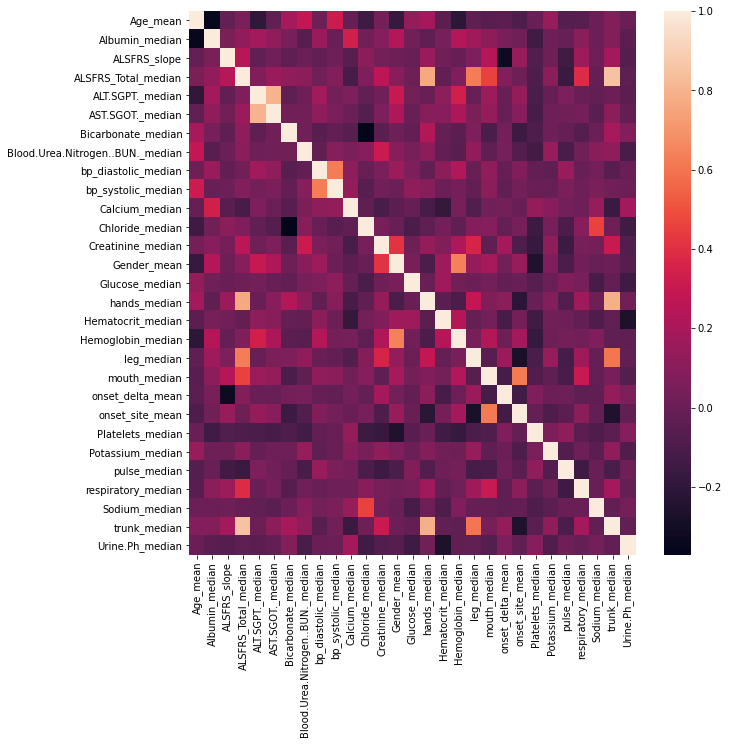

In [13]:
plt.figure(figsize=(10,10))
sb.heatmap(training_data.corr())
plt.show()

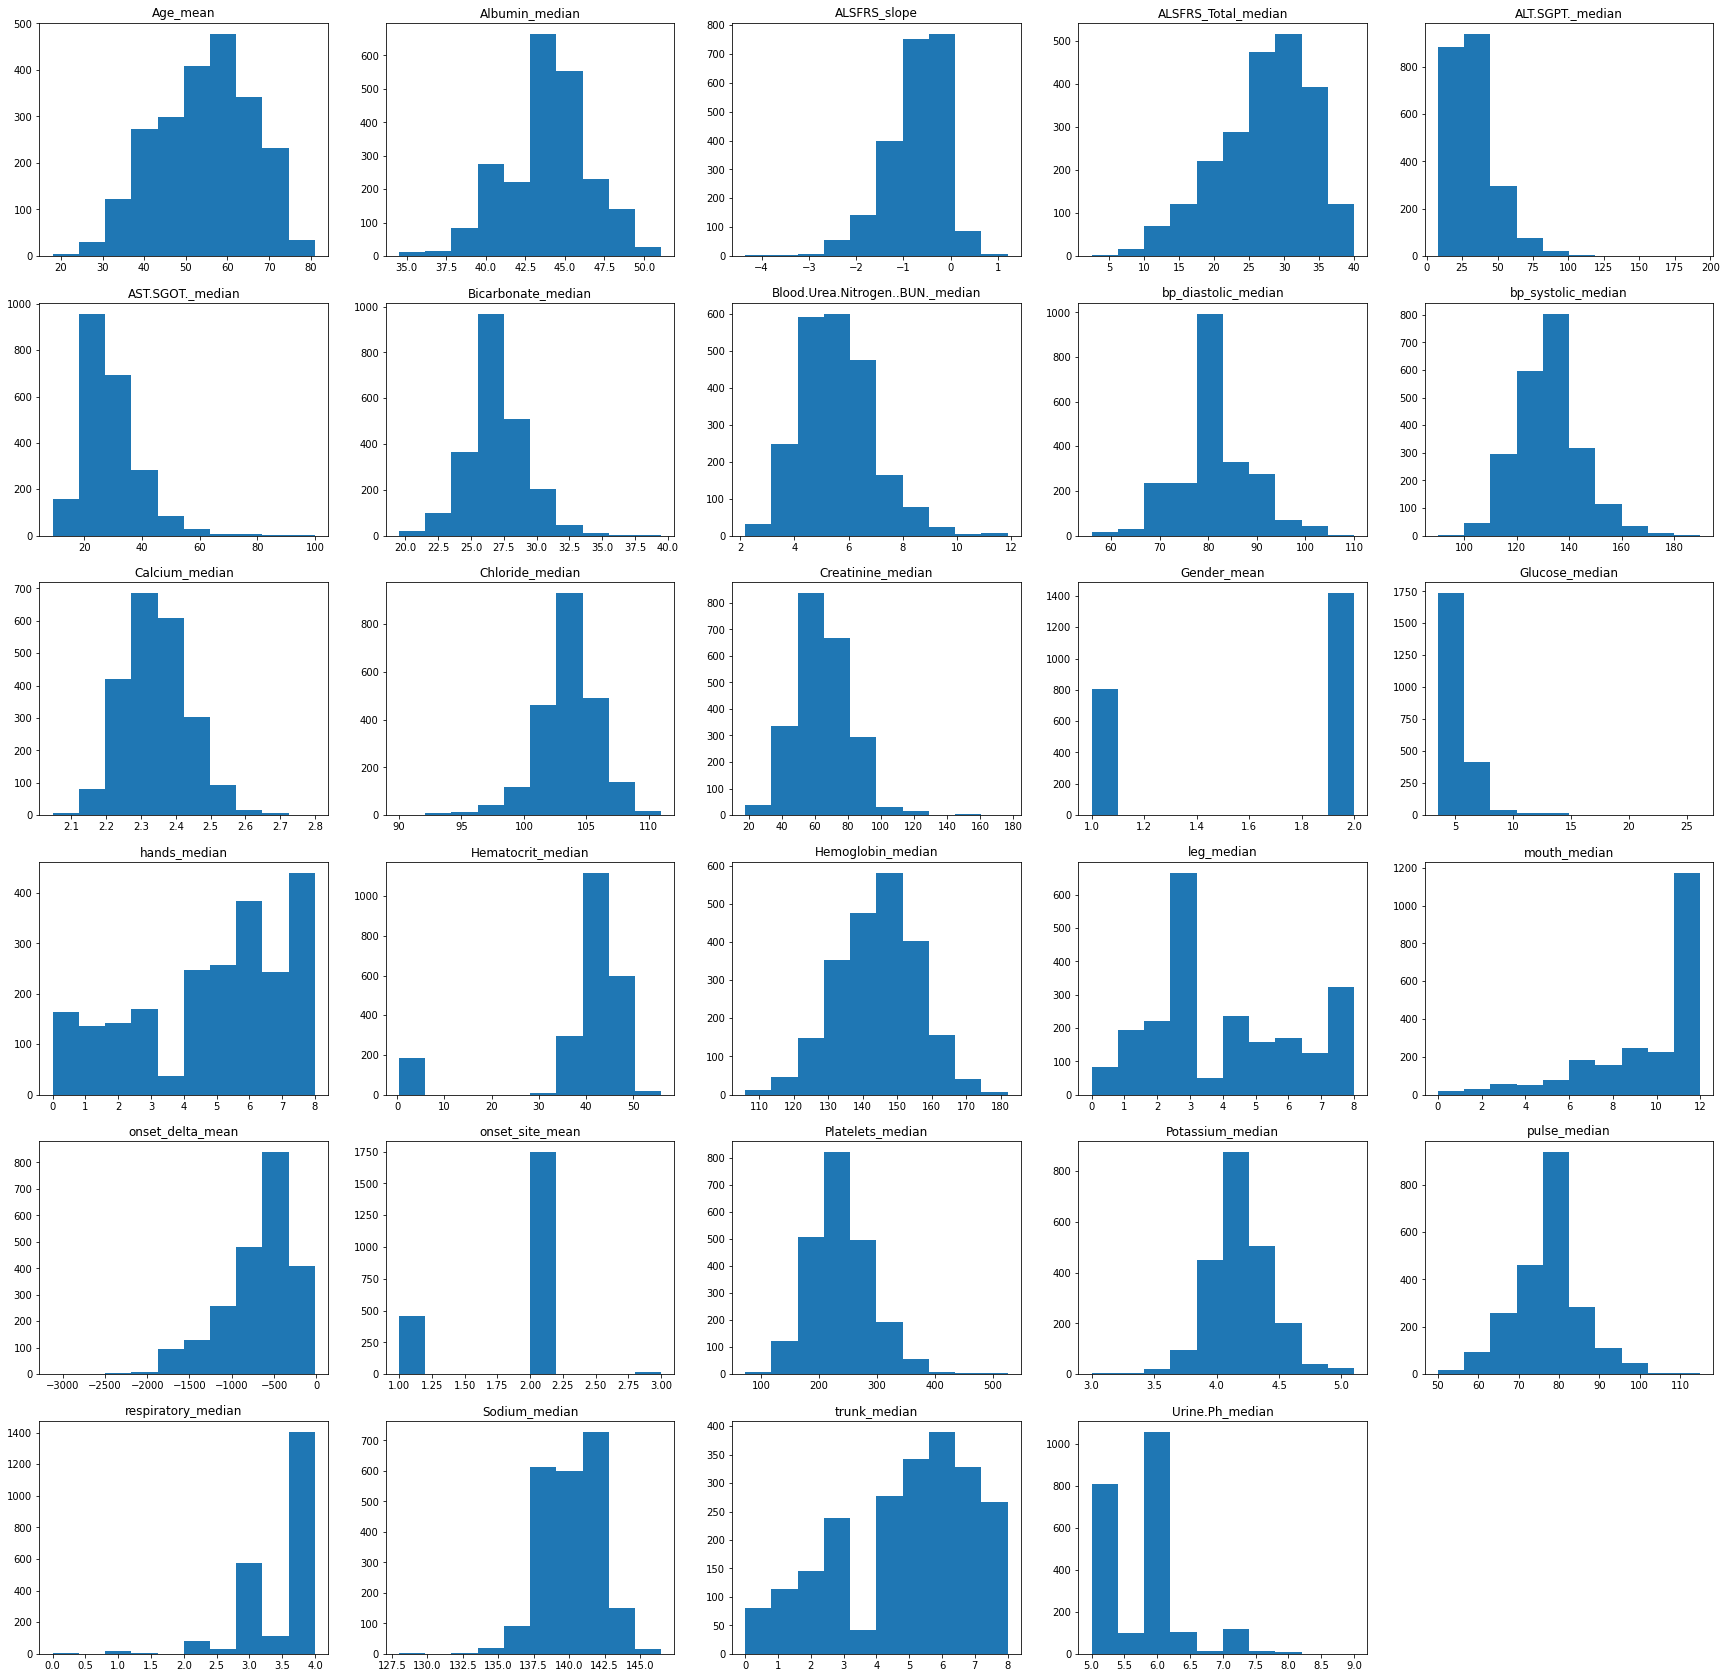

In [14]:
i = 1
plt.figure(figsize=(30,30))

for column in training_data.columns:
  plt.subplot(6,5,i)
  plt.title(column)
  plt.hist(training_data[column])
  if i < training_data.shape[1]:
    i += 1

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(training_data)
y = sc.fit_transform(testing_data)  

In [95]:
from sklearn.decomposition import PCA
X = PCA(n_components=2).fit_transform(X)
y = PCA(n_components=2).fit_transform(y)

In [96]:
from sklearn.cluster import KMeans

In [97]:
sse = []

for k in range(1,11):
  model = KMeans(n_clusters=k)
  model.fit(X)
  sse.append(model.inertia_)

sse

[14857.670119704508,
 9348.903623917688,
 6171.832871798531,
 4744.831774058464,
 3996.5959227589165,
 3315.692159202479,
 2886.0850291419392,
 2563.0892055795675,
 2290.7190558935795,
 2085.2426638488946]

Text(0, 0.5, 'SSE')

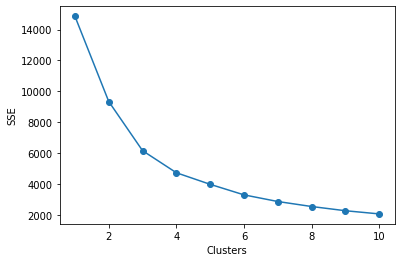

In [98]:
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')

In [103]:
import numpy as np

In [107]:
km_3 = KMeans(n_clusters=3)
y_pred_3 = km_3.fit_predict(y)
np.unique(y_pred_3,return_counts=True)

(array([0, 1, 2], dtype=int32), array([31, 26, 21]))

In [108]:
km_3.cluster_centers_

array([[ 2.16664026, -0.45697333],
       [-0.93640223,  1.81165239],
       [-2.03901858, -1.56841852]])

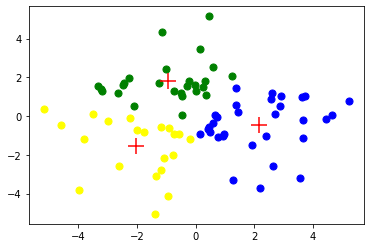

In [113]:
plt.scatter(y[y_pred_3==0,0],y[y_pred_3==0,1],s=50,marker='o',c='blue')
plt.scatter(y[y_pred_3==1,0],y[y_pred_3==1,1],s=50,marker='o',c='green')
plt.scatter(y[y_pred_3==2,0],y[y_pred_3==2,1],s=50,marker='o',c='yellow')
plt.scatter(km_3.cluster_centers_[:,0],km_3.cluster_centers_[:,1],s=250,marker="+",c="red")